In [16]:
import numpy as np
import pandas as pd
from sklearn import metrics, neighbors, datasets, svm
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.utils import resample
df1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",names=['buying','maint','door','persons','lug_boot','safety','review'])
df1.head()
array = df1.values
# separate array into input and output components
X, Y = array[:, 0:7], array[:, 4]
# ensure inputs are floats and output is an integer label
Le= LabelEncoder()
X[:, 0] = Le.fit_transform(X[:, 0])
X[:, 1] = Le.fit_transform(X[:, 1])
X[:, 4] = Le.fit_transform(X[:, 4])
X[:, 2] = Le.fit_transform(X[:, 2])
X[:, 3] = Le.fit_transform(X[:, 3])
X[:, 5] = Le.fit_transform(X[:, 5])
X[:, 6] = Le.fit_transform(X[:, 6])

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:4,:])
print (rescaledX.mean(axis = 0))      # tính giá trị trung bình mỗi cột
print (rescaledX.std(axis = 0))       # tính giá trị phương sai mỗi cột

[[ 1.342  1.342 -1.342 -1.225  1.225  0.     0.51 ]
 [ 1.342  1.342 -1.342 -1.225  1.225  1.225  0.51 ]
 [ 1.342  1.342 -1.342 -1.225  1.225 -1.225  0.51 ]
 [ 1.342  1.342 -1.342 -1.225  0.     0.     0.51 ]]
[0.000e+00 0.000e+00 1.645e-17 0.000e+00 0.000e+00 0.000e+00 4.112e-18]
[1. 1. 1. 1. 1. 1. 1.]


Good: 1210
Vgood: 384
unacc: 69
acc: 65


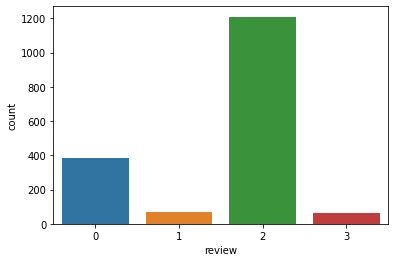

In [17]:
good, vgood, unacc, acc = df1.review.value_counts()
print(f'Good: {good}')
print(f'Vgood: {vgood}')
print(f'unacc: {unacc}')
print(f'acc: {acc}')
sns.countplot(x = 'review', data = df1);

3    1210
2    1210
1    1210
0    1210
Name: review, dtype: int64


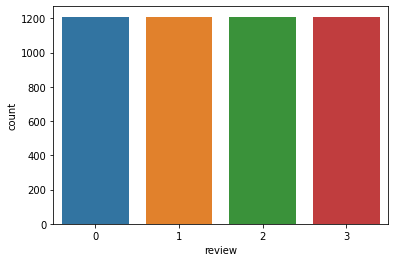

In [18]:
df_2 = df1[df1.review == 2]
df_0 = df1[df1.review == 0]
df_3 = df1[df1.review == 3]
df_1 = df1[df1.review == 1]
count_class_0, count_class_1, count_class_2, count_class_3 = df1.review.value_counts()
# # print(count_class_0)
# # Oversampling
random_seed = 5180440
np.random.seed(random_seed)
df_new_1 = resample(df_1, replace=True, n_samples=len(df_2), random_state=random_seed)
df_new_0 = resample(df_0, replace=True, n_samples=len(df_2), random_state=random_seed)
df_new_3 = resample(df_3, replace=True, n_samples=len(df_2), random_state=random_seed)
df_test_under = pd.concat([df_new_1, df_new_0, df_new_3, df_2])
print(df_test_under.review.value_counts())
sns.countplot(x = 'review', data=df_test_under);

In [19]:
X=df1.iloc[:,:-1]
Y = df1.loc[:,["review"]]
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
X=X.apply(le1.fit_transform)
Y=Y.apply(le2.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
y_pred = neigh.fit(X_train, y_train.values.ravel())
predictions = neigh.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[137   0  56   0]
 [ 17   9   6   0]
 [ 29   1 569   0]
 [ 20   2   4  14]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       193
           1       0.75      0.28      0.41        32
           2       0.90      0.95      0.92       599
           3       1.00      0.35      0.52        40

    accuracy                           0.84       864
   macro avg       0.83      0.57      0.64       864
weighted avg       0.85      0.84      0.83       864



In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train.values.ravel())
predictions = gnb.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 13   1  86  93]
 [  4   1  13  14]
 [  4   0 511  84]
 [  0   0   0  40]]
              precision    recall  f1-score   support

           0       0.62      0.07      0.12       193
           1       0.50      0.03      0.06        32
           2       0.84      0.85      0.85       599
           3       0.17      1.00      0.30        40

    accuracy                           0.65       864
   macro avg       0.53      0.49      0.33       864
weighted avg       0.75      0.65      0.63       864



In [22]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train.values.ravel())
predictions1 = gnb.predict(X_test)
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[ 13   1  86  93]
 [  4   1  13  14]
 [  4   0 511  84]
 [  0   0   0  40]]
              precision    recall  f1-score   support

           0       0.62      0.07      0.12       193
           1       0.50      0.03      0.06        32
           2       0.84      0.85      0.85       599
           3       0.17      1.00      0.30        40

    accuracy                           0.65       864
   macro avg       0.53      0.49      0.33       864
weighted avg       0.75      0.65      0.63       864



In [23]:
from sklearn.naive_bayes import BernoulliNB
clf1 = BernoulliNB()
clf1.fit(X_train, y_train.values.ravel())
predictions2 = gnb.predict(X_test)
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[ 13   1  86  93]
 [  4   1  13  14]
 [  4   0 511  84]
 [  0   0   0  40]]
              precision    recall  f1-score   support

           0       0.62      0.07      0.12       193
           1       0.50      0.03      0.06        32
           2       0.84      0.85      0.85       599
           3       0.17      1.00      0.30        40

    accuracy                           0.65       864
   macro avg       0.53      0.49      0.33       864
weighted avg       0.75      0.65      0.63       864



In [24]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf2.fit(X_train, y_train.values.ravel())
predictions2 = clf2.predict(X_test)
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[158   0  35   0]
 [ 32   0   0   0]
 [ 31   0 568   0]
 [ 32   0   0   8]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71       193
           1       0.00      0.00      0.00        32
           2       0.94      0.95      0.95       599
           3       1.00      0.20      0.33        40

    accuracy                           0.85       864
   macro avg       0.64      0.49      0.50       864
weighted avg       0.84      0.85      0.83       864



c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
clf3 = MLPClassifier(hidden_layer_sizes=(10,10,10),random_state=1, max_iter=300).fit(X_train, y_train)
predictions2 = clf3.predict(X_test)
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[174   5  14   0]
 [ 11  21   0   0]
 [ 22   0 577   0]
 [ 14  19   0   7]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       193
           1       0.47      0.66      0.55        32
           2       0.98      0.96      0.97       599
           3       1.00      0.17      0.30        40

    accuracy                           0.90       864
   macro avg       0.81      0.67      0.66       864
weighted avg       0.92      0.90      0.89       864



c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd', loss='mse')
# This builds the model for the first time:
clf4=model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
27/27 [==============================] - 0s 1ms/step - loss: 0.9897
Epoch 2/10
27/27 [==============================] - 0s 1ms/step - loss: 0.8652
Epoch 3/10
27/27 [==============================] - 0s 1ms/step - loss: 0.8393
Epoch 4/10
27/27 [==============================] - 0s 1ms/step - loss: 0.7814
Epoch 5/10
27/27 [==============================] - 0s 1ms/step - loss: 0.7712
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 0.7579
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 0.7359
Epoch 8/10
27/27 [==============================] - 0s 1ms/step - loss: 0.7362
Epoch 9/10
27/27 [==============================] - 0s 2ms/step - loss: 0.7201
Epoch 10/10
27/27 [==============================] - 0s 1ms/step - loss: 0.7168


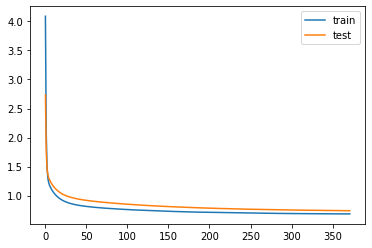

In [45]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4000, verbose=0, callbacks=[es])
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

ValueError: in user code:

    c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    c:\users\phand_2f80hbx\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_12 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape [32, 6]
